# Plotting Vlasov-Poisson Model Results

In [6]:
import json
from pathlib import Path

import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from neuralop.models import FNO

In [7]:
data = np.load("/trabajo/FNOs/gad_64/delta_z1.npy")
data.shape

(64, 64, 64)

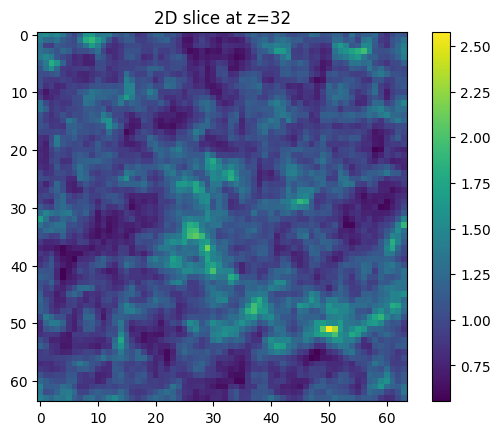

In [8]:
# Plot 2d slide of 64,64,64
import matplotlib.pyplot as plt

plt.imshow(data[:,32,:], cmap='viridis')
plt.colorbar()
plt.title("2D slice at z=32")
plt.show()

In [3]:
# Plotting Vlasov-Poisson Model Results
results_path = '/home/ia/asantillan/Proyects/VlasovPoisson/experiments/VlasovPoisson/2025-07-28_19-33-35_new_arch'
results_ckpt = Path(results_path) / '_state_dict.pt'
results_model_config = Path(results_path) / 'config.json'
dataset_path = Path('/home/ia/asantillan/Proyects/VlasovPoisson/vlasov_dataset.npy')

## Dataset

In [5]:
dataset = np.load(dataset_path) # 17, 256, 256, 256, 2
dataset = dataset.astype(np.float32)
dataset = torch.from_numpy(dataset)
dataset = dataset.permute(0, 4, 1, 2, 3)  # Change to (batch_size, channels, depth, height, width)
dataset.shape

torch.Size([17, 2, 256, 256, 256])

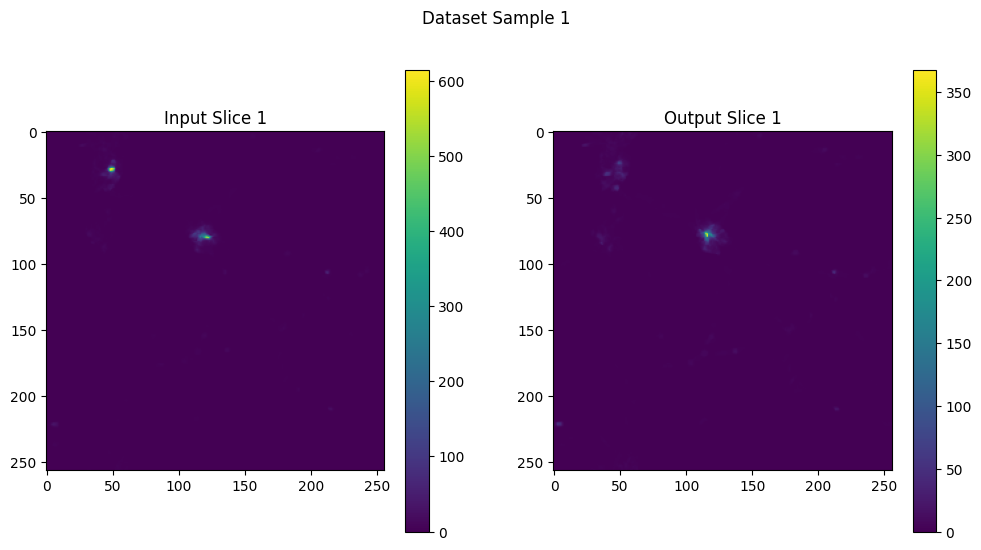

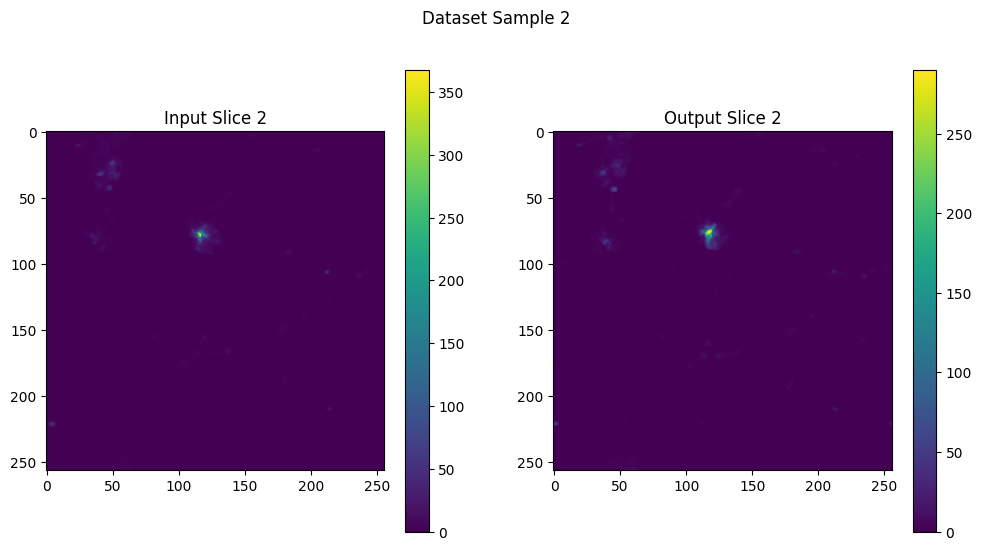

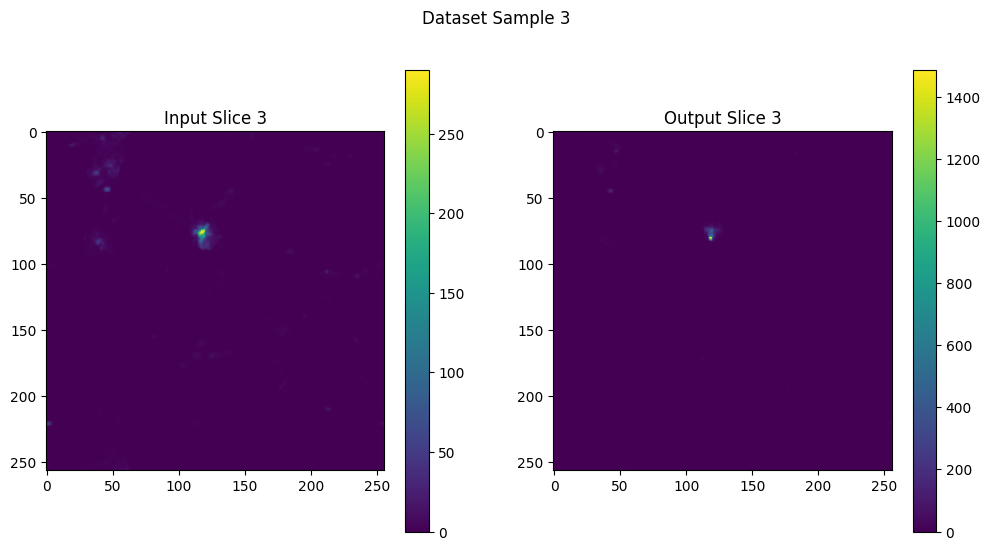

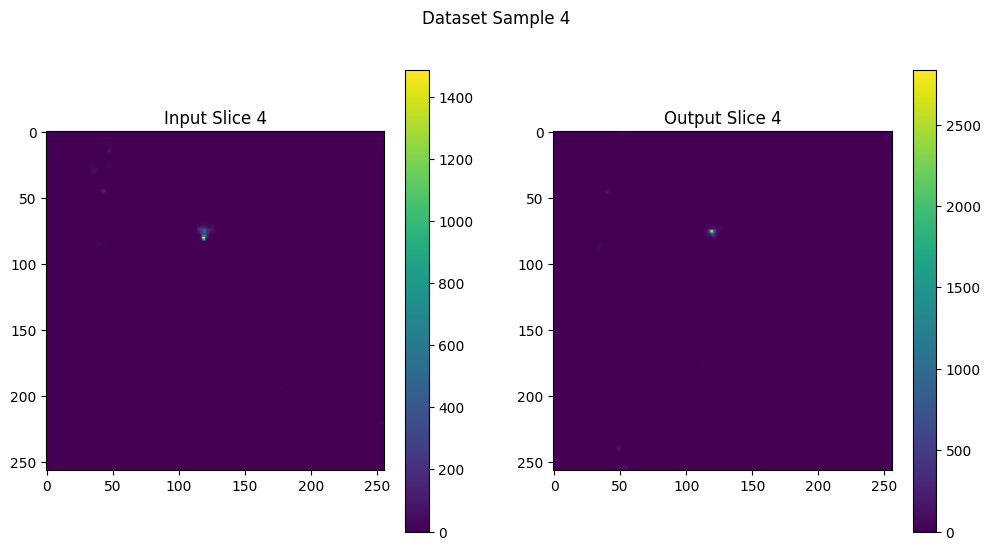

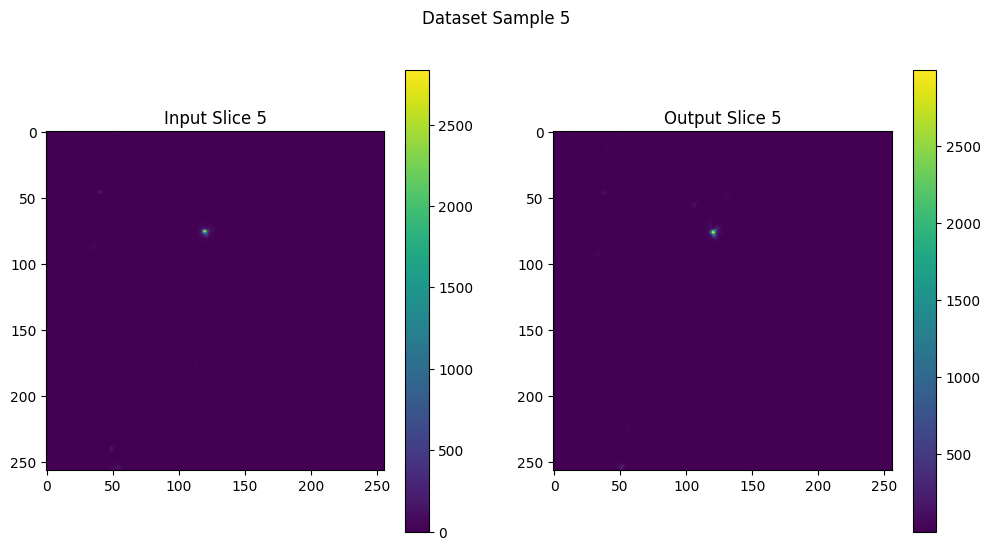

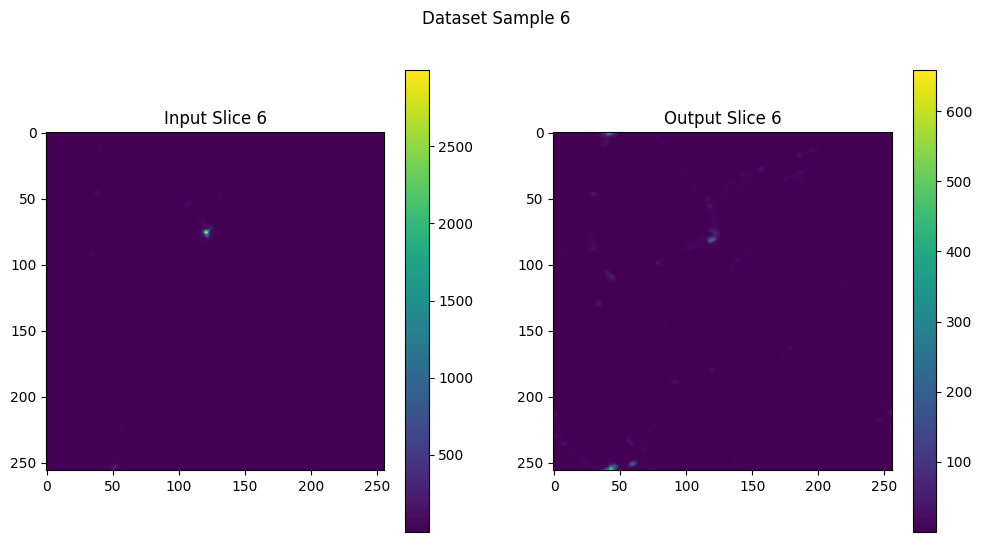

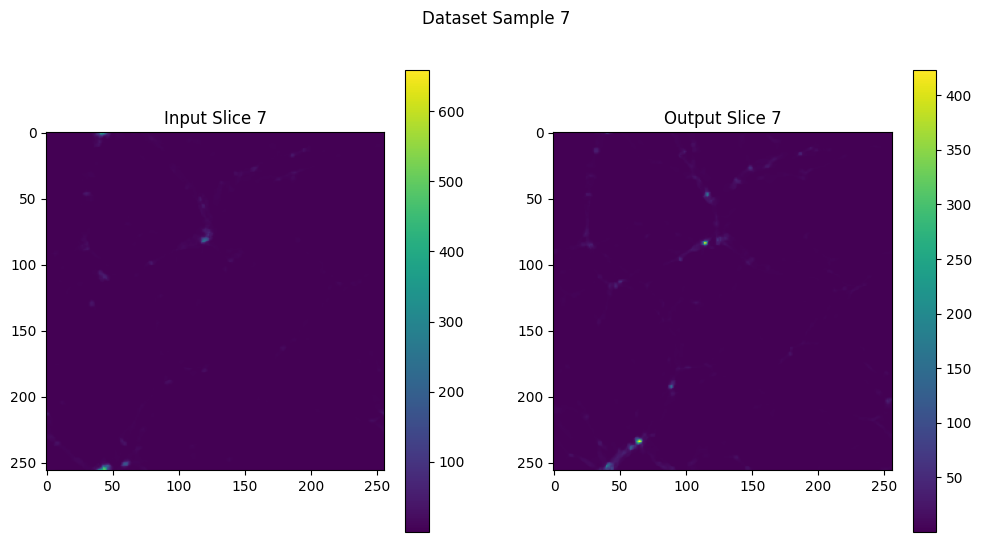

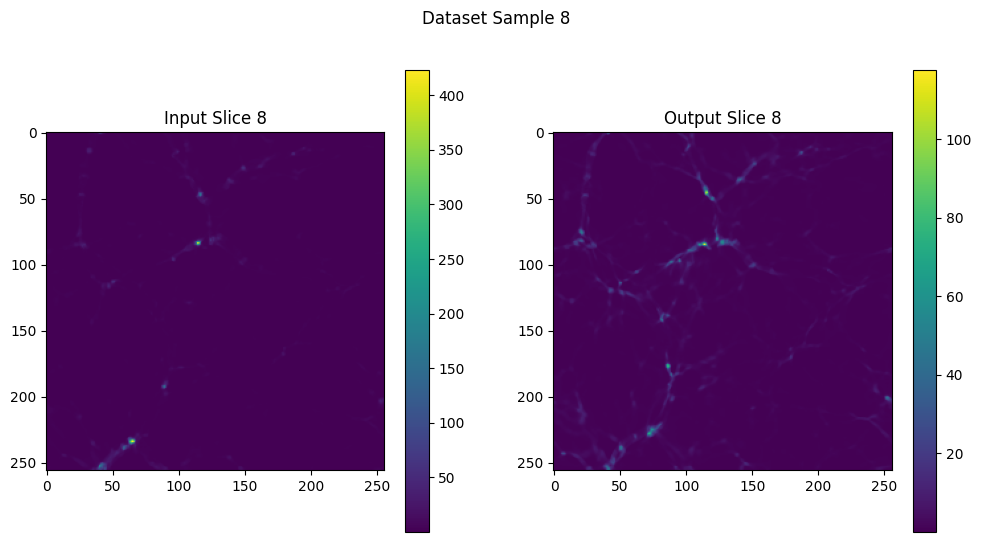

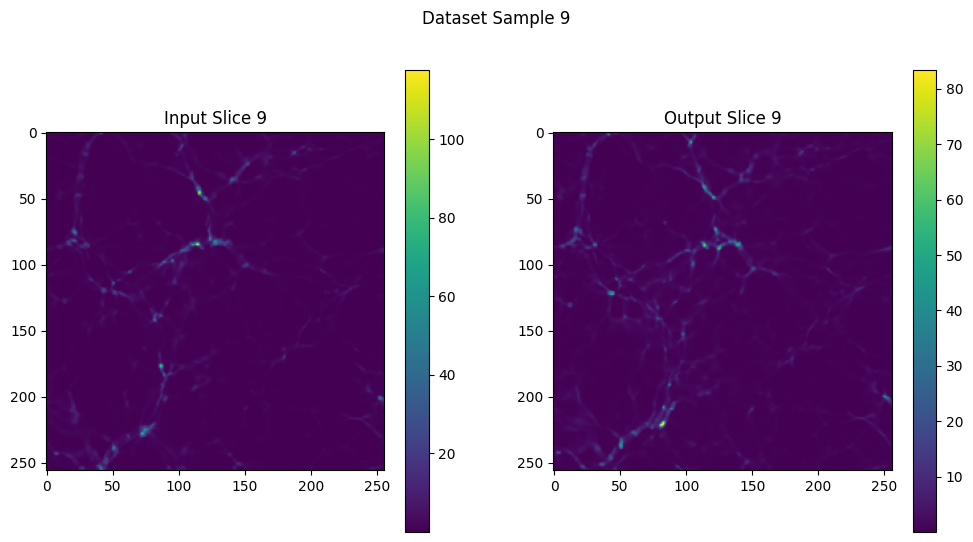

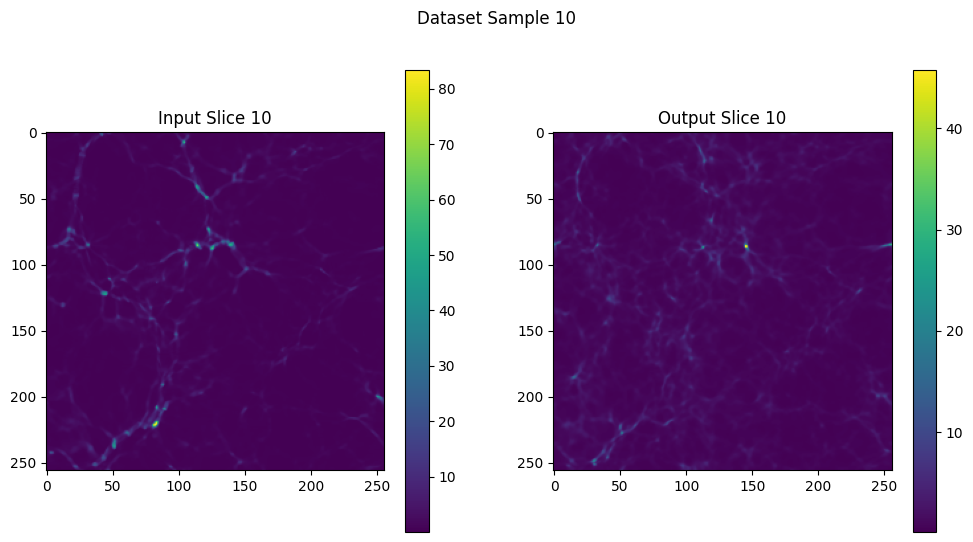

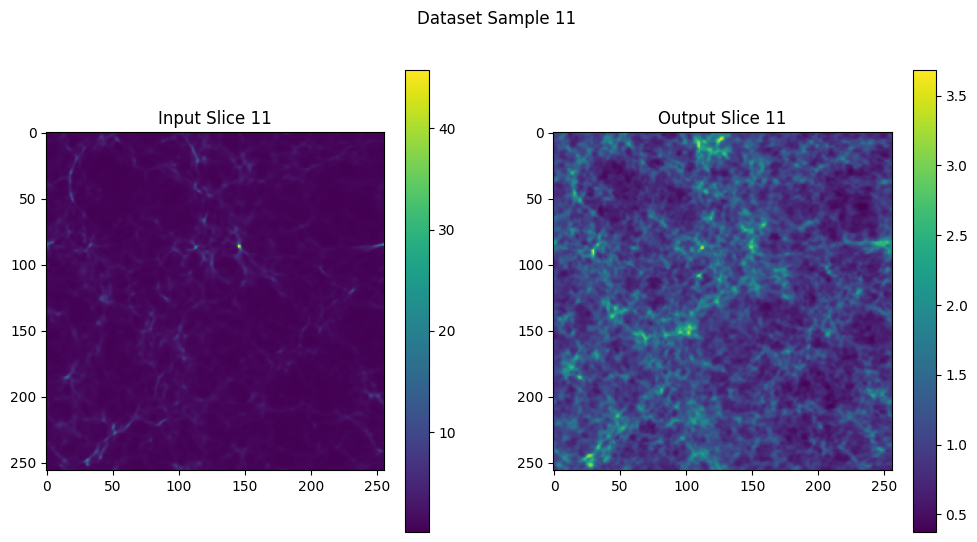

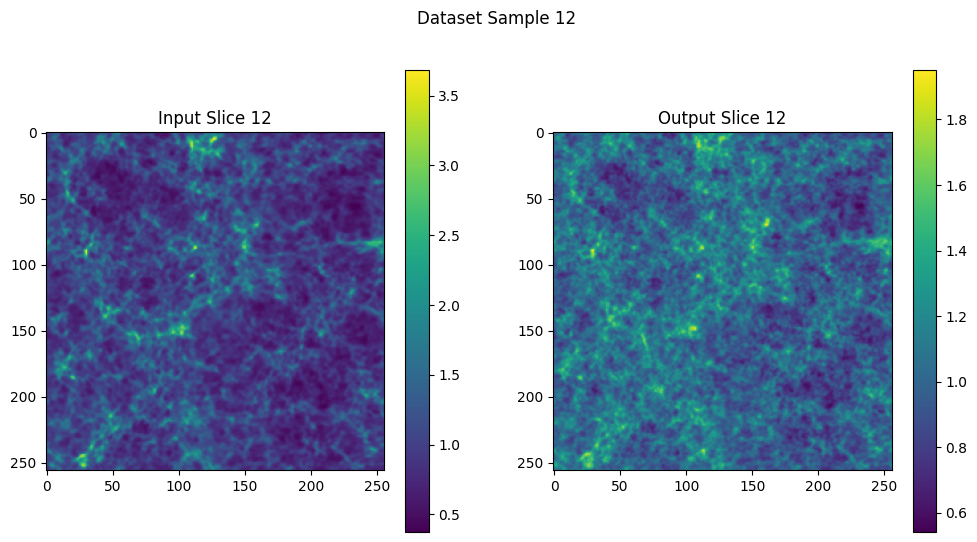

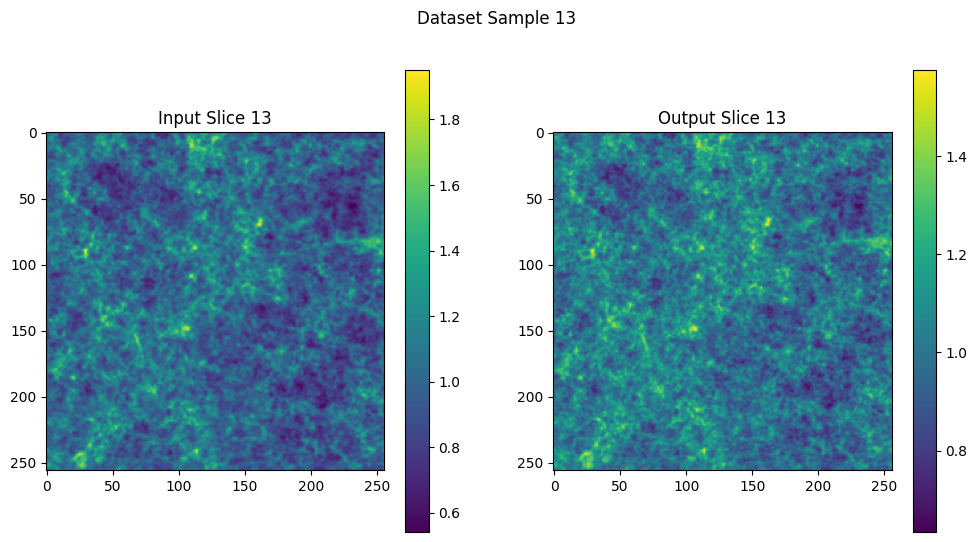

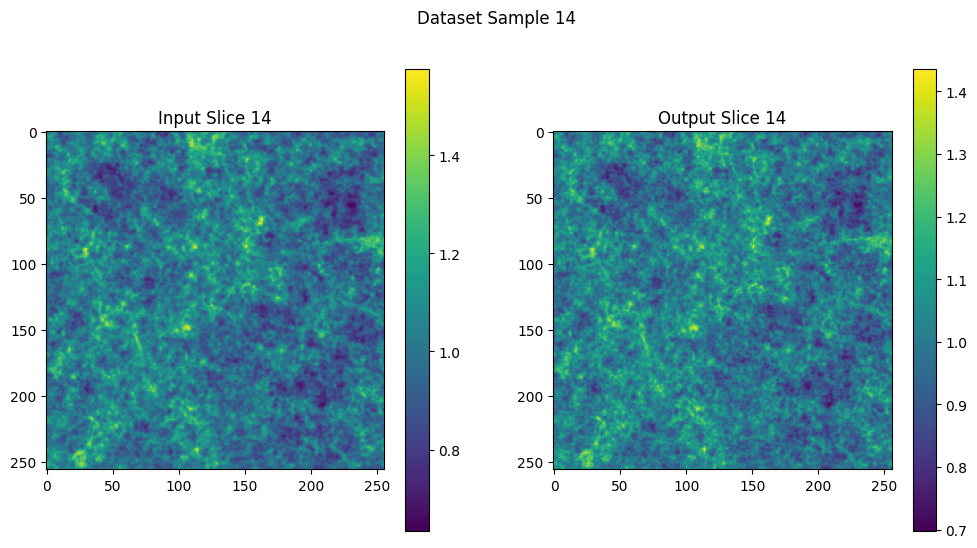

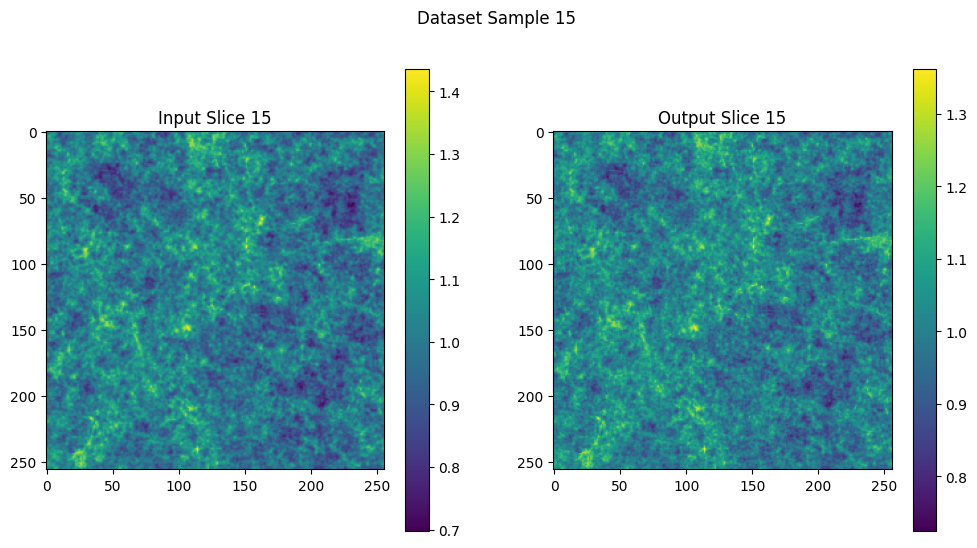

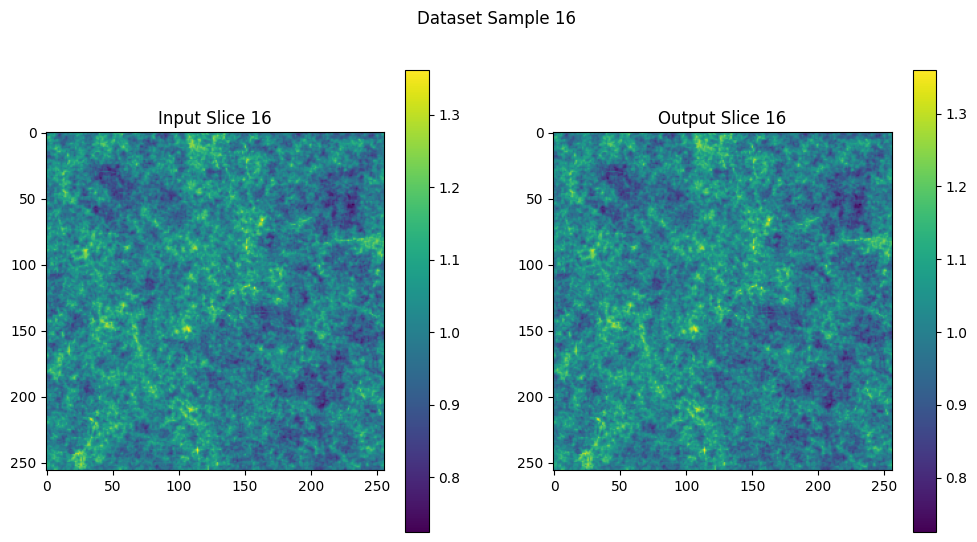

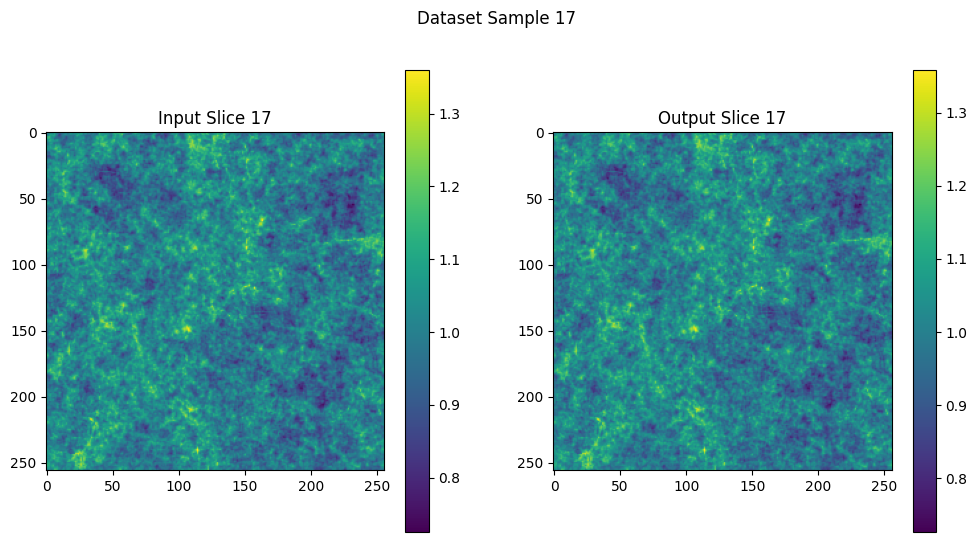

In [10]:
# Plot each slice of the 3D output
for i in range(dataset.shape[0]):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(dataset[i, 0, :, :, 128].cpu().numpy(), cmap='viridis')
    plt.colorbar(ax[0].imshow(dataset[i, 0, :, :, 128].cpu().numpy(), cmap='viridis'), ax=ax[0])
    ax[0].set_title(f"Input Slice {i+1}")
    ax[1].imshow(dataset[i, 1, :, :, 128].cpu().numpy(), cmap='viridis')
    plt.colorbar(ax[1].imshow(dataset[i, 1, :, :, 128].cpu().numpy(), cmap='viridis'), ax=ax[1])
    ax[1].set_title(f"Output Slice {i+1}")
    plt.suptitle(f"Dataset Sample {i+1}")
    plt.show()
    

## Model

In [41]:
model_config = json.load(open(results_model_config))
model = FNO(**model_config['model'])
checkpoint = torch.load(results_ckpt, weights_only=False, map_location='cpu')

In [42]:
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [ ]:
model.eval()
dummy_input = torch.randn(1, 4, 64, 64, 64)  # Adjust dimensions as needed
with torch.no_grad():
    output = model(dummy_input)
    print(output.shape)

/home/ia/asantillan/Proyects/VlasovPoisson/.venv/lib/python3.12/site-packages/neuralop/layers/spectral_convolution.py:432: UserWarning: ComplexHalf support is experimental and many operators don't support it yet. (Triggered internally at /pytorch/aten/src/ATen/EmptyTensor.cpp:56.)
  x = x.chalf()


## Otro

In [2]:
all_preds = np.load("/home/ia/asantillan/Proyects/VlasovPoisson/experiments/VlasovPoisson/2025-07-28_19-33-35_new_arch/new_arch_prediction.npy")
all_preds.shape

(1, 128, 128, 128)